In [36]:
netlist_data = """

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid        3  5 
L1                 3         1   #SQUIDL(1.68)pH fcheck
L2                 3         4   #SQUIDL(1.68)pH fcheck
B1                 1         5  jjmod area=#JJAREA(v=0.45, shunt = JJSHUNT)
R1                 1         5   #JJSHUNT(18.08)ohm
B2                 2         5  jjmod area=#JJAREA(v=0.45)
R2                 2         5   #JJSHUNT(18.08)ohm
B3                 4         2  pjjmod area=#PJJAREA(20, fix = true)
.ends
* ============================================

.subckt JTL     1  5  100
L1               1  2   #JTLL1(14.46)pH fcheck
L2               2  3   #JTLL1(14.46)pH fcheck
L3               3  4   #JTLL1(14.46)pH fcheck
L4               4  5   #JTLL1(14.46)pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   #JTLR1(130.98)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin1                    2    0   PWL(0ps 0mV  400ps 0mV 401ps 0.517mV 402ps 0.517mV 403ps 0mV   600ps 0mV 601ps 0.517mV 602ps 0.517mV 603ps 0mV   800ps 0mV 801ps 0.517mV 802ps 0.517mV 803ps 0mV  1000ps 0mV 1001ps 0.517mV 1002ps 0.517mV 1003ps 0mV)
X2       JTL4           2     3  100
X3       JTL4           3     4  100
X8       JTL4           4     5  100
X9       JTL4           5     6  100
R1                      6     13  8.32ohm
L1                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=1.25,fix = true)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1|X1|X3
.print phase B2|X1|X1|X3

.print phase B1|X1|X1|X8
.print phase B2|X1|X1|X8

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

In [ ]:
netlist_data2 = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid        3  5 
L1                 3         1   #SQUIDL(1.75)pH fcheck
L2                 3         4   #SQUIDL(1.75)pH fcheck
B1                 1         5  jjmod area=#JJAREA(v=0.49, shunt = JJSHUNT)
R1                 1         5   #JJSHUNT(15.88)ohm
B2                 2         5  jjmod area=#JJAREA(v=0.49)
R2                 2         5   #JJSHUNT(15.88)ohm
B3                 4         2  pjjmod area=#PJJAREA(20, fix = true)
.ends
* ============================================

.subckt JTL     1  5  100
L1               1  2   #JTLL1(18)pH fcheck
L2               2  3   #JTLL1(18)pH fcheck
L3               3  4   #JTLL1(18)pH fcheck
L4               4  5   #JTLL1(18)pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   #JTLR1(100)ohm
.ends

.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends

*** top cell:  
Vin1                    2    0   PWL(0ps 0mV  400ps 0mV 401ps 0.517mV 402ps 0.517mV 403ps 0mV   600ps 0mV 601ps 0.517mV 602ps 0.517mV 603ps 0mV   800ps 0mV 801ps 0.517mV 802ps 0.517mV 803ps 0mV  1000ps 0mV 1001ps 0.517mV 1002ps 0.517mV 1003ps 0mV)
X2       JTL4           2     3  100
X3       JTL4           3     4  100
X8       JTL4           4     5  100
X9       JTL4           5     6  100
R1                      6     13  8.32ohm
L1                      13     0  2pH fcheck
Vb                      100    0  pwl(0ps 0mV 100ps #BIAS(v=1.2,fix = true)mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps

.print phase B1|X1|X1|X3
.print phase B2|X1|X1|X3

.print phase B1|X1|X1|X8
.print phase B2|X1|X1|X8

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

In [37]:
import importlib
from optimize import data
importlib.reload(data)

d = data.Data(netlist_data2, True)

--- List of variables to optimize ---
            def    main     sub element    fix    shunt    dp  dpv  tmp
char                                                                   
SQUIDL     1.68    1.68    1.68       L    0.0     None   1.0  7.0  0.0
JJAREA     0.45    0.45    0.45       B  False  JJSHUNT  True  7.0  0.0
JJSHUNT   18.08   18.08   18.08       R  False     None  True  7.0  0.0
PJJAREA   20.00   20.00   20.00       B   True     None  True  7.0  0.0
JTLL1     14.46   14.46   14.46       L  False     None  True  7.0  0.0
JTLR1    130.98  130.98  130.98       R  False     None  True  7.0  0.0
BIAS       1.25    1.25    1.25       V   True     None  True  7.0  0.0


--- Period to calculate the initial value of bias ---
1e-10  ~  4e-10


--- SQUID used for judging the operation ---
[['P(B1|X1|X1|X3)', 'P(B2|X1|X1|X3)'], ['P(B1|X1|X1|X8)', 'P(B2|X1|X1|X8)']]





.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

*PYSQUID=========================================================================

.subckt psquid        3  5 
L1                 3         1   1.68pH fcheck
L2                 3         4   1.68pH fcheck
B1                 1         5  jjmod area=0.45
R1                 1         5   18.08ohm
B2                 2         5  jjmod area=0.45
R2                 2         5   18.08ohm
B3                 4         2  pjjmod area=20.0
.ends

* ===================================================


.subckt JTL     1  5  100
L1               1  2   14.46pH fcheck
L2               2  3   14.46pH fcheck
L3               3  4   14.46pH fcheck
L4               4  5   14.46pH fcheck
X1    psquid     3  0
X2    psquid     5  0
R1               100  4   130.98ohm
.ends


.subckt JTL4    1  5  100
X1       JTL            1  2  10

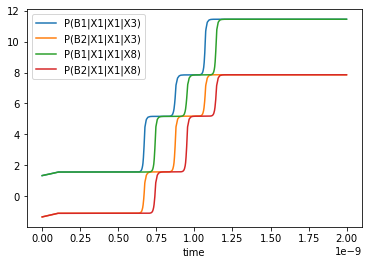

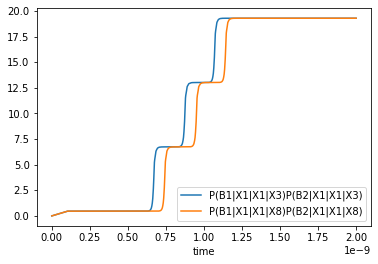

In [38]:
d.default_simulation(True)

In [39]:
from optimize import margin
importlib.reload(margin)

# res = margin.get_margins(d)
# margin.plot(res)
margin.optimize(d,'/home/tanetakumi/main/hfq-optimizer/template/optimize/optimize-data10')




ばらつき0 : 0回目の最適化開始
最小マージン :  JJAREA    21.875000000000004
ばらつき0 : 0回目の最適化終了
ばらつき0 : 1回目の最適化開始
最小マージン :  JJAREA    21.875000000000004
ばらつき0 : 1回目の最適化終了
ばらつき1 : 0回目の最適化開始
最小マージン :  JJAREA    17.96874999999998
ばらつき1 : 0回目の最適化終了
ばらつき1 : 1回目の最適化開始
最小マージン :  JJAREA    9.374999999999995
ばらつき1 : 1回目の最適化終了
ばらつき2 : 0回目の最適化開始
最小マージン :  JJAREA    19.921875
ばらつき2 : 0回目の最適化終了
ばらつき2 : 1回目の最適化開始
最小マージン :  JJAREA    23.046874999999993
ばらつき2 : 1回目の最適化終了
ばらつき3 : 0回目の最適化開始
最小マージン :  JJAREA    17.187500000000018
ばらつき3 : 0回目の最適化終了
ばらつき3 : 1回目の最適化開始
最小マージン :  JJAREA    18.359375000000014
ばらつき3 : 1回目の最適化終了
ばらつき4 : 0回目の最適化開始
最小マージン :  JJAREA    17.968749999999982
ばらつき4 : 0回目の最適化終了
ばらつき4 : 1回目の最適化開始
最小マージン :  JJAREA    11.718749999999993
ばらつき4 : 1回目の最適化終了
ばらつき5 : 0回目の最適化開始
最小マージン :  JJAREA    17.187499999999982
ばらつき5 : 0回目の最適化終了
ばらつき5 : 1回目の最適化開始
最小マージン :  JJAREA    14.843749999999988
ばらつき5 : 1回目の最適化終了
ばらつき6 : 0回目の最適化開始
最小マージン :  JJAREA    14.062500000000014
ばらつき6 : 0回目の最適化終了
ばらつき6 : 1回目の最適化開始
最小マージン :  JJAREA  

In [40]:
# margin.plot(res)